<a href="https://colab.research.google.com/github/BedarAsad/Dice/blob/master/Health_Data_Science_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**
### **Introduction**

Obesity is a growing global health concern, with significant implications for individuals' well-being and healthcare systems worldwide. According to the World Health Organization (WHO), obesity has nearly tripled since 1975, affecting people of all ages and socioeconomic backgrounds. It is a major risk factor for chronic diseases such as diabetes, cardiovascular diseases, and certain types of cancer. In Latin America, countries like Mexico, Peru, and Colombia are experiencing rising obesity rates, driven by changes in dietary habits, sedentary lifestyles, and urbanization.

Understanding the factors that contribute to obesity is crucial for developing effective prevention and intervention strategies. Advances in data science and machine learning offer powerful tools to analyze complex datasets and predict obesity levels based on eating habits, physical activity, and other lifestyle factors. By leveraging these technologies, public health programs can identify at-risk individuals, design targeted interventions, and monitor the effectiveness of their initiatives.

This assignment focuses on estimating obesity levels using a dataset from Mexico, Peru, and Colombia. The dataset includes information on individuals' eating habits, physical condition, and demographic characteristics. The goal is to apply machine learning techniques to classify obesity levels and derive actionable insights for public health interventions. The assignment involves several key steps, including exploratory data analysis (EDA), feature engineering, model development, and result interpretation. Through this process, we aim to build a robust predictive model and provide recommendations for addressing obesity in the region.

The findings from this analysis have the potential to inform public health policies, guide personalized health interventions, and contribute to the global effort to combat obesity. By combining data-driven insights with practical recommendations, this assignment seeks to make a meaningful impact on public health outcomes.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load the dataset
url = "/content/drive/My Drive/ObesityDataSet_raw_and_data_sinthetic.csv"
data = pd.read_csv(url)

# Display the first few rows
print(data.head())

# Check basic info
print(data.info())

# Summary statistics
print(data.describe())
# Display the first few rows
print(data.head())

# Check basic info
print(data.info())

# Summary statistics
print(data.describe())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  

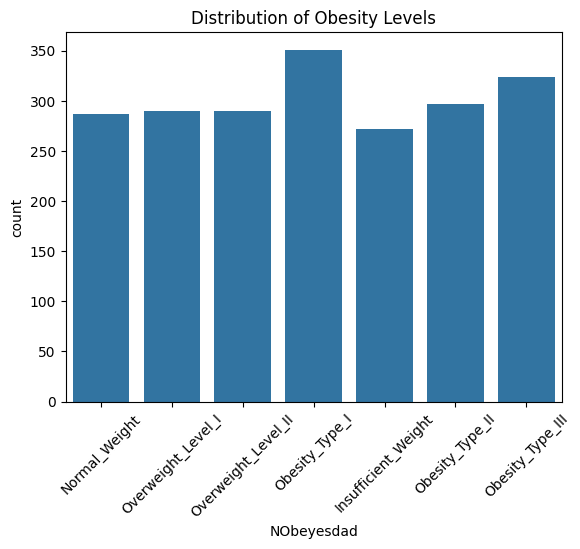

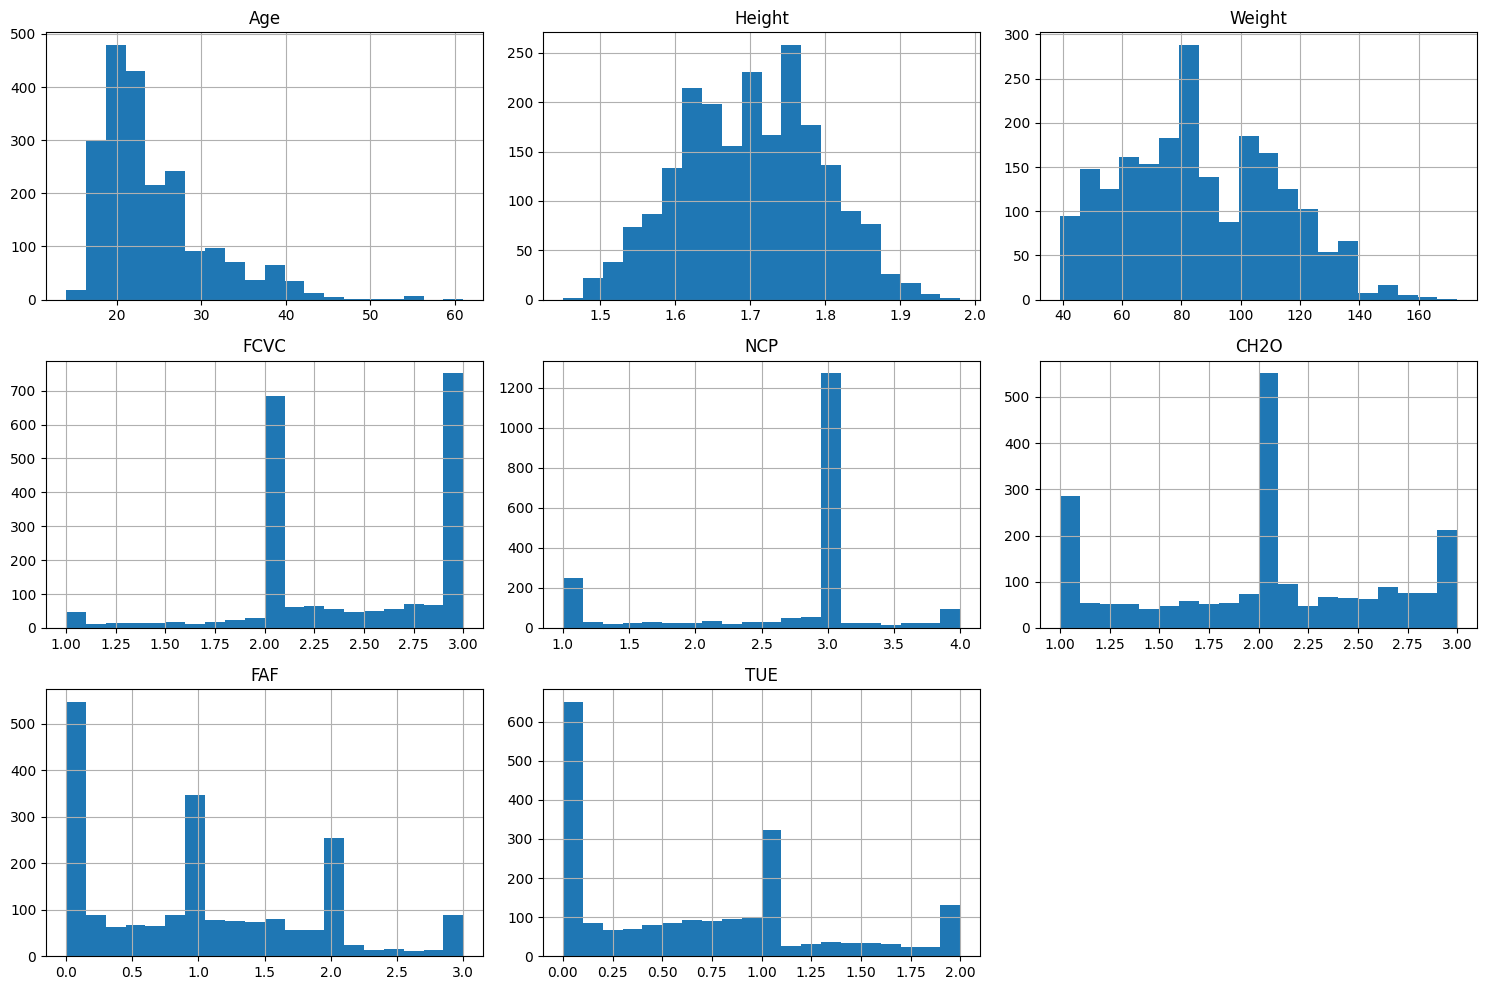

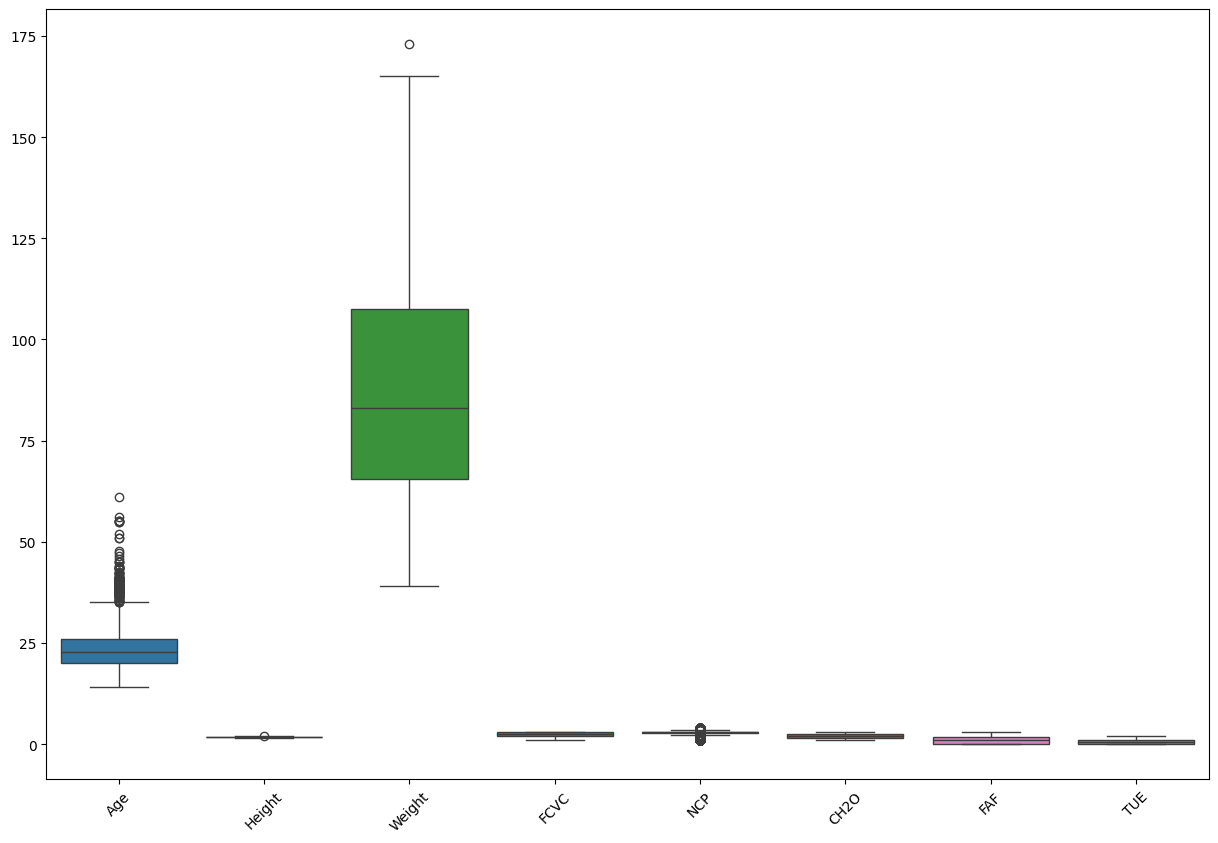

In [2]:
# Plot the distribution of the target variable (NObesity)
sns.countplot(x="NObeyesdad", data=data)
plt.title("Distribution of Obesity Levels")
plt.xticks(rotation=45)
plt.show()

# Plot histograms for numerical features
data.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

# Box plots for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=data.select_dtypes(include=[np.number]))
plt.xticks(rotation=45)
plt.show()

Handle Missing Data and Outliers

In [3]:
# Check for missing values
print(data.isnull().sum())

# Handle outliers (example for 'Age' column)
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1
data = data[(data['Age'] >= Q1 - 1.5 * IQR) & (data['Age'] <= Q3 + 1.5 * IQR)]

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


**Feature Engineering**

In [4]:
# One-hot encode categorical variables
data = pd.get_dummies(data, columns=["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS"], drop_first=True)

# Display the updated dataset
print(data.head())

    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE           NObeyesdad  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0        Normal_Weight   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0        Normal_Weight   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0        Normal_Weight   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0   Overweight_Level_I   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0  Overweight_Level_II   

   Gender_Male  ...  CAEC_no  SMOKE_yes  SCC_yes  CALC_Frequently  \
0        False  ...    False      False    False            False   
1        False  ...    False       True     True            False   
2         True  ...    False      False    False             True   
3         True  ...    False      False    False             True   
4         True  ...    False      False    False            False   

   CALC_Sometimes  CALC_no  MTRANS_Bike  MTRANS_Motorbike  \
0           False     True        False             False   
1           

In [5]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
numerical_features = ["Age", "Height", "Weight", "FCVC", "NCP", "CH2O", "FAF", "TUE"]
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the updated dataset
print(data.head())

        Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
0 -0.451778 -0.923427 -0.843229 -0.782532  0.393325 -0.031117 -1.212670   
1 -0.451778 -2.006397 -1.141054  1.055091  0.393325  1.604216  2.335837   
2  0.012879  1.025921 -0.359264 -0.782532  0.393325 -0.031117  1.153001   
3  0.942195  1.025921  0.013016  1.055091  0.393325 -0.031117  1.153001   
4 -0.219449  0.809327  0.117255 -0.782532 -2.176804 -0.031117 -1.212670   

        TUE           NObeyesdad  Gender_Male  ...  CAEC_no  SMOKE_yes  \
0  0.500633        Normal_Weight        False  ...    False      False   
1 -1.143370        Normal_Weight        False  ...    False       True   
2  0.500633        Normal_Weight         True  ...    False      False   
3 -1.143370   Overweight_Level_I         True  ...    False      False   
4 -1.143370  Overweight_Level_II         True  ...    False      False   

   SCC_yes  CALC_Frequently  CALC_Sometimes  CALC_no  MTRANS_Bike  \
0    False            False        

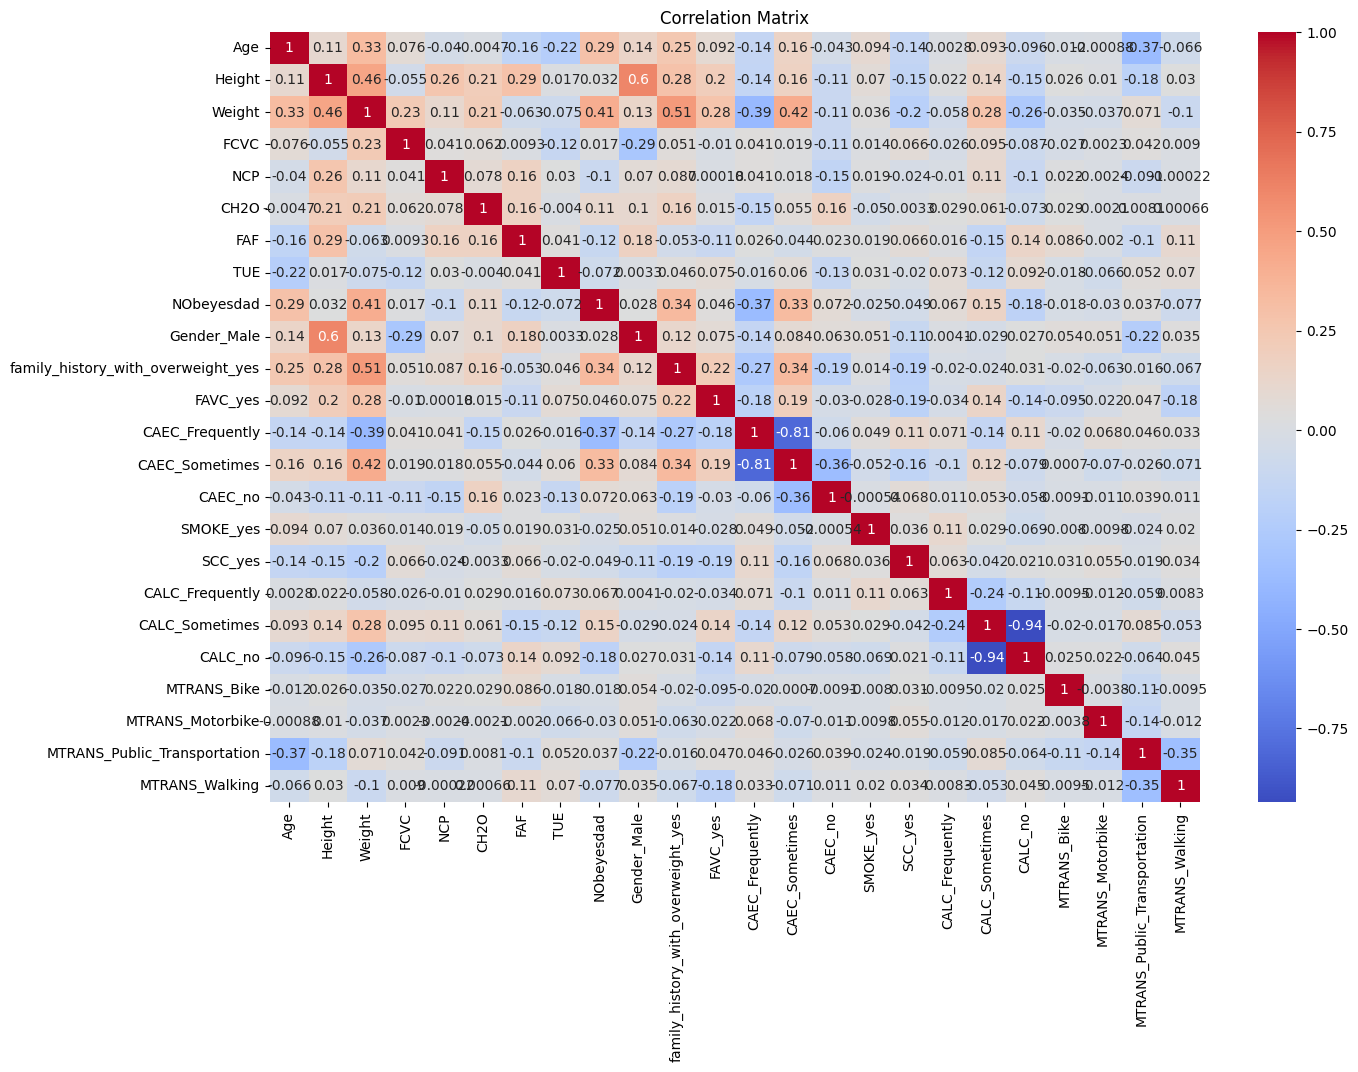

In [8]:
# Convert 'NObeyesdad' column to numerical using Label Encoding
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['NObeyesdad'] = label_encoder.fit_transform(data['NObeyesdad'])

# Now calculate the correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Drop highly correlated features (if any) - Re-evaluate after encoding
# Ensure 'Weight' is present after potential data manipulations before dropping
if 'Weight' in data.columns:
    data = data.drop(columns=["Weight"])
else:
    print("Warning: 'Weight' column not found in DataFrame.")

**Model Development**

In [9]:
from sklearn.model_selection import train_test_split

# Split into features and target
X = data.drop("NObeyesdad", axis=1)
y = data["NObeyesdad"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.6658097686375322
Decision Tree Accuracy: 0.7583547557840618
Random Forest Accuracy: 0.8637532133676092


In [11]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

# Perform GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Model Accuracy: 0.8637532133676092


**Result Interpretation and Visualization**

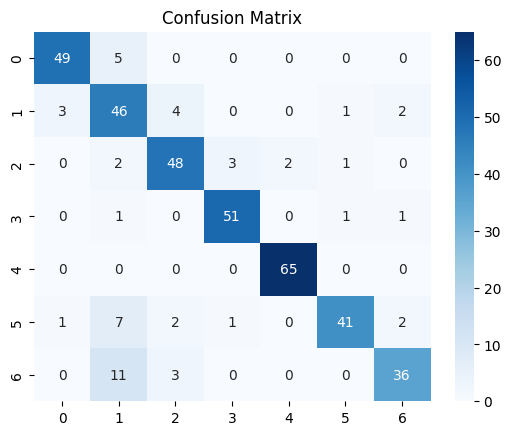

              precision    recall  f1-score   support

           0       0.92      0.91      0.92        54
           1       0.64      0.82      0.72        56
           2       0.84      0.86      0.85        56
           3       0.93      0.94      0.94        54
           4       0.97      1.00      0.98        65
           5       0.93      0.76      0.84        54
           6       0.88      0.72      0.79        50

    accuracy                           0.86       389
   macro avg       0.87      0.86      0.86       389
weighted avg       0.87      0.86      0.87       389



In [12]:
from sklearn.metrics import confusion_matrix, classification_report

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print(classification_report(y_test, y_pred_best))

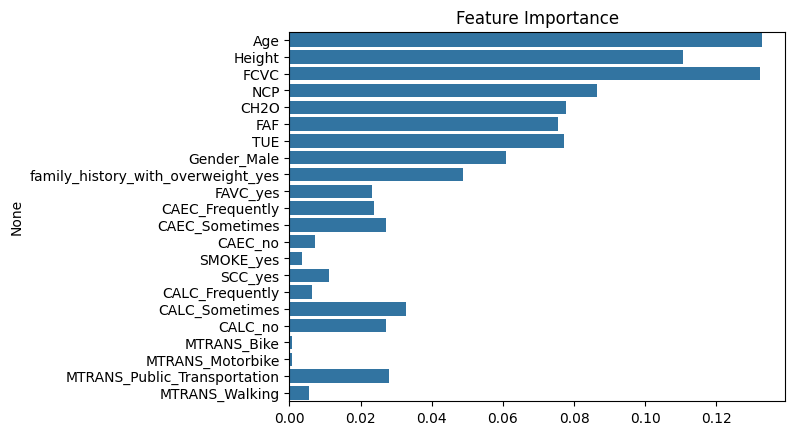

In [13]:
# Plot feature importance for Random Forest
importances = best_model.feature_importances_
feature_names = X.columns
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()

**Research Application**

### **1. How the Model Can Be Used in Public Health Programs**

The developed model for estimating obesity levels based on eating habits and physical condition can be a valuable tool for public health programs. Here are some potential applications:

#### **a. Personalized Health Interventions**
- The model can identify individuals at risk of obesity and provide personalized recommendations for diet and physical activity.
- For example, if the model predicts that someone is at risk of Obesity Type II, health programs can suggest specific dietary changes (e.g., reducing high-calorie food intake) and exercise routines.

#### **b. Targeted Awareness Campaigns**
- Public health organizations can use the model to identify demographic groups or regions with higher obesity prevalence.
- This information can guide targeted awareness campaigns to promote healthy eating and active lifestyles.

#### **c. School and Workplace Programs**
- Schools and workplaces can use the model to assess the obesity risk of students or employees.
- Based on the predictions, they can implement wellness programs, such as providing healthier meal options or organizing fitness challenges.

#### **d. Policy Making**
- Governments can use insights from the model to design policies aimed at reducing obesity rates.
- For example, policies could include subsidies for healthy foods, restrictions on junk food advertising, or investments in public recreational facilities.

#### **e. Monitoring and Evaluation**
- The model can be used to monitor the effectiveness of public health interventions over time.
- By regularly assessing obesity levels, health programs can adjust their strategies to achieve better outcomes.

---

### **2. Limitations of the Study**

While the model provides valuable insights, it has several limitations that should be acknowledged:

#### **a. Synthetic Data**
- The dataset is 77% synthetic, generated using tools like Weka and SMOTE. Synthetic data may not fully capture the complexity and variability of real-world data.
- This could limit the model's generalizability to real-world populations.

#### **b. Regional Bias**
- The dataset is limited to individuals from Mexico, Peru, and Colombia. The model may not perform well for populations in other regions with different cultural, dietary, and lifestyle patterns.
- For example, eating habits in Asia or Europe may differ significantly from those in Latin America.

#### **c. Feature Limitations**
- The dataset includes only 16 features, which may not capture all factors influencing obesity (e.g., genetic predisposition, mental health, socioeconomic status).
- The absence of such features could reduce the model's predictive power.

#### **d. Class Imbalance**
- If certain obesity levels are underrepresented in the dataset, the model may struggle to accurately predict those classes.
- Techniques like oversampling or class weighting may be required to address this issue.

#### **e. Model Interpretability**
- While the model provides predictions, interpreting the underlying reasons for those predictions (e.g., feature importance) can be challenging, especially for complex models like Random Forest.

---

### **3. Future Research Directions**

To address the limitations and improve the model's effectiveness, future research could focus on the following areas:

#### **a. Incorporate Genetic Data**
- Genetic factors play a significant role in obesity. Future studies could include genetic data (e.g., SNPs related to metabolism) to improve the model's accuracy.
- This would enable more personalized and precise interventions.

#### **b. Expand Dataset Coverage**
- Collect data from diverse regions and populations to reduce regional bias and improve generalizability.
- Include individuals from different age groups, socioeconomic backgrounds, and cultural contexts.

#### **c. Add More Features**
- Incorporate additional features such as mental health indicators (e.g., stress levels, sleep quality), socioeconomic status, and environmental factors (e.g., access to parks, grocery stores).
- These features could provide a more comprehensive understanding of obesity risk factors.

#### **d. Use Advanced Modeling Techniques**
- Explore advanced machine learning techniques like deep learning or ensemble methods to improve predictive performance.
- Investigate explainable AI (XAI) methods to enhance model interpretability.

#### **e. Longitudinal Studies**
- Conduct longitudinal studies to track individuals' health over time and understand how changes in eating habits and physical activity affect obesity levels.
- This would provide insights into the long-term effectiveness of interventions.

#### **f. Real-World Deployment**
- Test the model in real-world settings, such as clinics or community health programs, to evaluate its practical utility.
- Gather feedback from healthcare professionals and users to refine the model.

#### **g. Ethical Considerations**
- Address ethical concerns related to data privacy, bias, and fairness in model predictions.
- Ensure that the model does not disproportionately impact specific demographic groups.

---

### **Conclusion**

The developed model has significant potential to contribute to public health programs by identifying individuals at risk of obesity and guiding targeted interventions. However, its limitations, such as reliance on synthetic data and regional bias, must be addressed to enhance its applicability. Future research should focus on incorporating additional data sources, improving model interpretability, and testing the model in real-world settings. By addressing these challenges, the model can become a powerful tool for combating obesity and promoting healthier lifestyles globally.